In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
# require('theme538')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2



In [4]:
# This statistic shows the total number of air-source heat pumps shipped in the United States from 2001 to 2021. 
# According to the source, 3.92 million air-source heat pumps were shipped in the United States in 2021.

# Data from: Statista (Sourced from Canary Media and EIA.)


In [5]:
df = pd.read_excel("statistic_id220358_us-air-source-heat-pump-shipments-2001-2021.xlsx", 'Data')

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.drop([0, 1, 2, 3], axis=0, inplace=True)

In [8]:
df.columns = ['year', 'shipments_in_mill']

In [9]:
df.to_csv('heat-pump-national-shipment.csv', index=False)

In [11]:
df

,year,shipments_in_mill
4,2001,1.44
5,2002,1.48
6,2003,1.63
7,2004,1.89
8,2005,2.14
9,2006,2.12
10,2007,1.90
11,2008,1.87
12,2009,1.64
13,2010,1.75


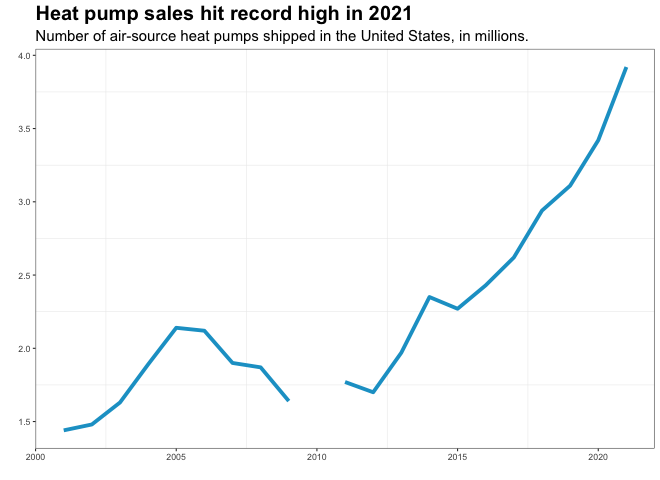

In [15]:
%%R -w 660

df <- read.csv(file = 'heat-pump-national-shipment.csv')
df1 <- df %>% filter(year < 2010)
df2 <- df %>% filter(year > 2010)


ggplot() +
    aes(x=year, y=shipments_in_mill) +
    geom_line(data=df1, color="#18a1cd", size=1.8) +
    geom_line(data=df2, color="#18a1cd", size=1.8) +
    labs(
        title="Heat pump sales hit record high in 2021",
        subtitle="Number of air-source heat pumps shipped in the United States, in millions.",
        x="",
        y="") +
    theme_bw() +
    theme(
        plot.title = element_text(size = 20, face = "bold"),
        plot.subtitle = element_text(size = 15),
        panel.grid.major.x = element_blank(),
        panel.grid.major.y = element_blank())
    

In [33]:
df['interpolated'] = df['year'].isin(['2010', '2011', '2009'])
df.to_csv('interpolated.csv')
df.head()

,year,shipments_in_mill,interpolated
4,2001,1.44,False
5,2002,1.48,False
6,2003,1.63,False
7,2004,1.89,False
8,2005,2.14,False


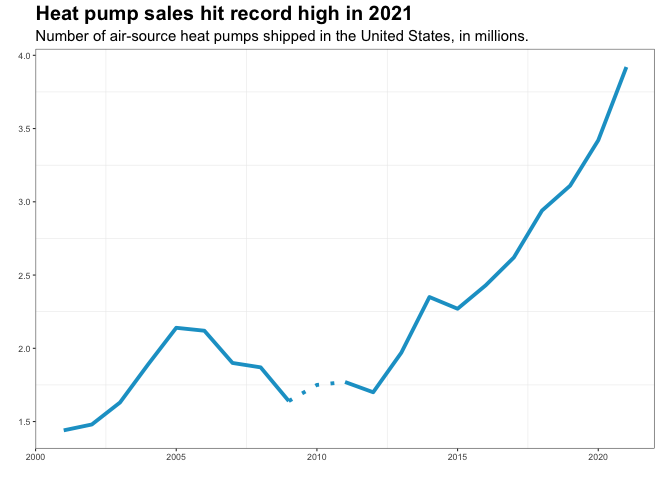

In [34]:
%%R -w 660

df <- read.csv(file = 'interpolated.csv')
df1 <- df %>% filter(year < 2010)
df2 <- df %>% filter(year > 2010)
df3 <- df %>% filter(interpolated == "True")

ggplot() +
    aes(x=year, y=shipments_in_mill) +
    geom_line(data=df1, color="#18a1cd", size=1.8) +
    geom_line(data=df2, color="#18a1cd", size=1.8) +
    geom_line(data=df3, color="#18a1cd", size=1.8, linetype=3) +
    labs(
        title="Heat pump sales hit record high in 2021",
        subtitle="Number of air-source heat pumps shipped in the United States, in millions.",
        x="",
        y="") +
    theme_bw() +
    theme(
        plot.title = element_text(size = 20, face = "bold"),
        plot.subtitle = element_text(size = 15),
        panel.grid.major.x = element_blank(),
        panel.grid.major.y = element_blank())
    